In [6]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [60]:
image = cv2.imread("./Lake.png", cv2.IMREAD_COLOR)

In [61]:
image.shape

(494, 480, 3)

In [62]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

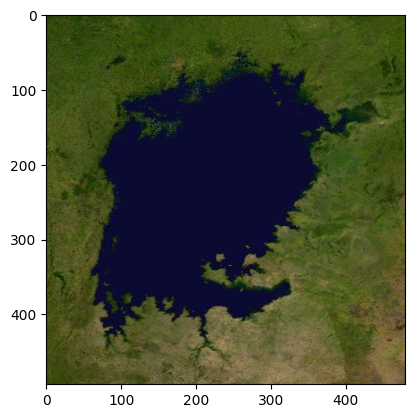

In [63]:
plt.imshow(image)

In [64]:
image_reshape = image.reshape(-1,3)

In [65]:
image_reshape.shape

(237120, 3)

In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [68]:
kmeans.fit(image_reshape)

/home/kaustuv/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [69]:
centroid = kmeans.cluster_centers_

In [70]:
centroid

array([[ 64.5388478 ,  79.58031013,  22.90507284],
       [ 11.64164618,  12.98876666,  45.77878866],
       [107.24597439, 103.44891395,  56.59493516]])

In [71]:
uint8_array = np.clip(centroid, 0, 255).astype(np.uint8)

In [72]:
uint8_array

array([[ 64,  79,  22],
       [ 11,  12,  45],
       [107, 103,  56]], dtype=uint8)

In [73]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [74]:
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [75]:
segmented_image = cluster_centers[labels]
segmented_image = segmented_image.reshape(image.shape)

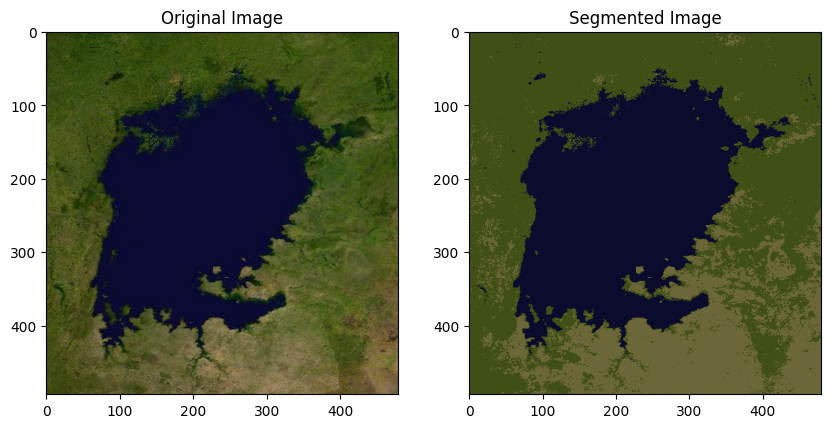

In [76]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')

plt.show()

In [77]:
num_clusters = 3

In [83]:
points_in_clusters = [[] for _ in range(num_clusters)]

In [84]:
for i, label in enumerate(labels):
    points_in_clusters[label].append(image_reshape[i])

In [99]:
pixel_no = []

In [100]:
for i in range(len(points_in_clusters)):
    print(f"Cluster {i} = {len(points_in_clusters[i])} px")
    pixel_no.append(len(points_in_clusters[i]))

Cluster 0 = 110905 px
Cluster 1 = 77278 px
Cluster 2 = 48937 px


In [95]:
uint8_array[0]

array([64, 79, 22], dtype=uint8)

In [105]:
cluster_color = uint8_array
cluster_color_normalized= [(r / 255, g / 255, b / 255) for (r, g, b) in cluster_color]

Text(0.5, 1.0, 'Pie Chart')

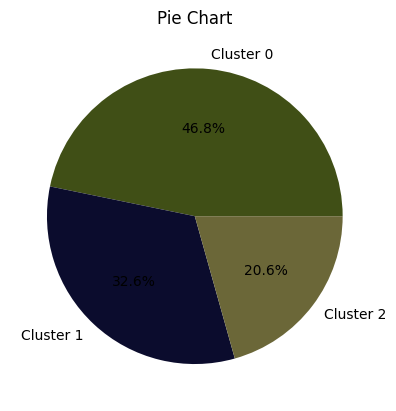

In [109]:
plt.pie(pixel_no, labels = [f"Cluster {i}" for i in range(num_clusters)],colors = cluster_color_normalized,autopct='%1.1f%%')
plt.title("Pie Chart")

In [118]:
cluster_R = uint8_array[:,0]
cluster_G = uint8_array[:,1]
cluster_B = uint8_array[:,2]
cluster_count = pixel_no

In [117]:
cluster_pixel

array([[ 64,  79,  22],
       [ 11,  12,  45],
       [107, 103,  56]], dtype=uint8)

In [121]:
data = {"Cluster_R" : cluster_R,"Cluster_G" : cluster_G,"Cluster_B" : cluster_B, "Cluster_count" : pixel_no}

In [122]:
df = pd.DataFrame(data)

In [123]:
df


,Cluster_R,Cluster_G,Cluster_B,Cluster_count
0,64,79,22,110905
1,11,12,45,77278
2,107,103,56,48937


In [125]:
lake_pixel = df.iloc[1,3]

In [126]:
lake_pixel

77278

In [127]:
total_area = 200000

In [129]:
area_for_pixel = total_area/sum(pixel_no)

In [130]:
Area_lake = lake_pixel * area_for_pixel

In [131]:
print(f"The area of lake is {Area_lake}")

The area of lake is 65180.49932523617


In [165]:
image_reshape_test = image_reshape.astype("float32") / 255

In [171]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42, max_iter=300)
    kmeans.fit(image_reshape)
    wcss.append(kmeans.inertia_)

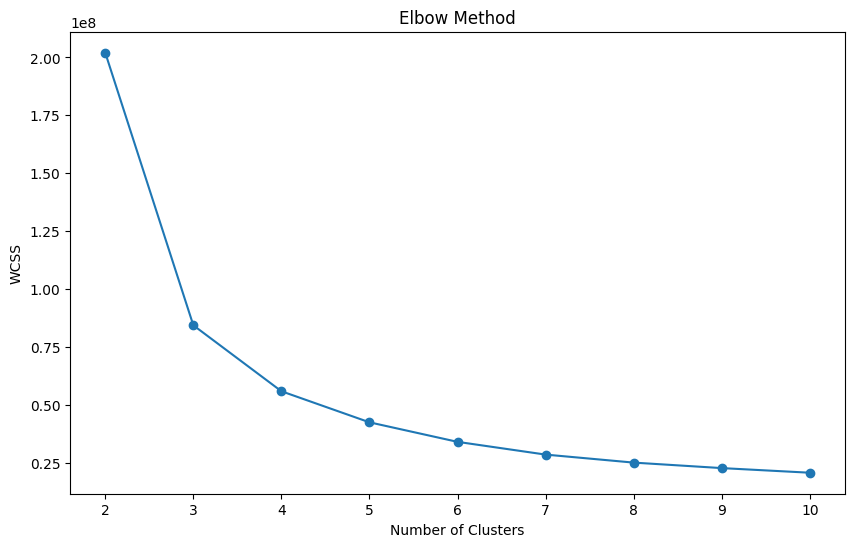

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.show()

In [174]:
kmeans1 = KMeans(n_clusters=4, random_state=42)

In [175]:
kmeans1.fit(image_reshape)

/home/kaustuv/.pyenv/versions/3.9.14/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [176]:
num_clusters = 4

In [177]:
points_in_clusters = [[] for _ in range(num_clusters)]

In [178]:
cluster_centers = kmeans1.cluster_centers_
labels = kmeans1.labels_

In [179]:
for i, label in enumerate(labels):
    points_in_clusters[label].append(image_reshape[i])
    

In [180]:
pixel_no = []

In [181]:
labels

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [182]:
for i in range(len(points_in_clusters)):
    print(f"Cluster {i} = {len(points_in_clusters[i])} px")
    pixel_no.append(len(points_in_clusters[i]))

Cluster 0 = 64162 px
Cluster 1 = 76025 px
Cluster 2 = 29197 px
Cluster 3 = 67736 px
